# 4 Pandas Pivot Tables

Similar to the ones in excel and google sheets :)

Will be using that do analyse trends over time.

We'll be looking at 3 job types to see how their salaries trend across 6 countries in our dataset. A different application will be done once we get to the project section.

---
We will be using the pivot_table() method from pandas.

There are 4 parameters we need to input in the method:
1. values
2. index: what we will be grouping by. Provide a column name.
3. columns
4. aggfunc: the agg we want - max, min, mean, count, median, etc.

In [1]:
# import libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# load data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# clean data - date column
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

## 4.1 Count of job titles

In [2]:
df.pivot_table(index="job_title_short", aggfunc="size")

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

## 4.2 Median salary by jobs

In [4]:
df.pivot_table(values="salary_year_avg", index="job_title_short", aggfunc="median")

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


## 4.3 Median salary by jobs AND country

This is what sets it apart from the groupby function. The 4.1 and 4.2 could have been done using the groupby function.

In [5]:
df.pivot_table(values="salary_year_avg", index="job_title_short", columns="job_country", aggfunc="median")

job_country,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Belarus,Belgium,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Cambodia,Canada,Chile,China,Colombia,"Congo, Democratic Republic of the",Costa Rica,Croatia,Cyprus,Czechia,Côte d'Ivoire,Denmark,Dominican Republic,Egypt,El Salvador,Estonia,Finland,France,Germany,Greece,Guam,Guatemala,Honduras,Hong Kong,Hungary,...,Nigeria,Northern Mariana Islands,Norway,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Romania,Russia,Senegal,Serbia,Singapore,Slovakia,Slovenia,South Africa,South Korea,Spain,Sri Lanka,Sudan,Sweden,Switzerland,Taiwan,Thailand,Tunisia,Turkey,U.S. Virgin Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
job_title_short,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Business Analyst,NaN,NaN,71100.00,NaN,70000.0,NaN,NaN,NaN,16500.0,NaN,89100.00,NaN,NaN,NaN,71925.0,NaN,85000.0,NaN,NaN,120000.0,NaN,81075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63000.0,NaN,89100.0,89100.0,63000.0,90000.0,NaN,63000.0,NaN,NaN,...,99575.0,NaN,NaN,57600.0,170500.0,NaN,NaN,63000.00,87050.0,72900.0,55000.000,80850.0,NaN,NaN,NaN,79200.0,NaN,30000.0,87050.00,NaN,86400.0,NaN,82665.00,89100.0,56700.0,71280.0,64800.0,NaN,NaN,100000.00,NaN,72900.0,NaN,56700.0,90000.0,NaN,NaN,79200.0,NaN,NaN
Cloud Engineer,NaN,NaN,197500.00,NaN,110000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86500.0,NaN,130000.0,NaN,NaN,182500.0,NaN,NaN,75000.0,NaN,56700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105968.0,89100.0,NaN,NaN,NaN,NaN,NaN,89100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64800.00,84150.0,NaN,86415.000,56700.0,280000.0,NaN,NaN,50400.0,NaN,NaN,NaN,79200.0,89100.0,NaN,70415.25,NaN,NaN,NaN,79200.0,NaN,NaN,NaN,NaN,89100.0,NaN,NaN,116100.0,NaN,NaN,NaN,NaN,NaN
Data Analyst,49950.00,44100.0,92771.75,100500.0,109500.0,80850.00,NaN,NaN,NaN,400000.0,77958.75,NaN,79200.0,NaN,103750.0,89204.0,98500.0,127250.0,68590.5,90000.0,111175.0,107862.5,56700.0,51014.0,98500.0,NaN,89100.0,NaN,54257.00,102500.0,56700.0,105650.0,69175.0,103750.0,99500.0,92500.0,NaN,NaN,59400.0,80850.0,...,98500.0,155485.5,73300.0,95187.5,45000.0,NaN,106837.5,83110.75,89100.0,89100.0,59000.000,72900.0,NaN,100500.0,79600.0,99500.0,NaN,NaN,72183.75,111175.0,91977.0,73549.25,87500.00,105650.0,57500.0,79200.0,111175.0,NaN,57600.0,115000.00,69300.0,72900.0,98500.0,87750.0,90000.0,100500.0,NaN,75550.0,NaN,63000.0
Data Engineer,NaN,45000.0,96773.00,48750.0,106712.5,147500.00,NaN,211000.0,97444.0,NaN,98301.50,NaN,147500.0,177500.0,144972.0,NaN,105000.0,146000.0,36000.0,96773.0,69300.0,147500.0,97108.5,133000.0,147500.0,147500.0,122136.5,NaN,87986.50,118750.0,113750.0,96773.0,98301.5,147500.0,96773.0,NaN,80000.0,NaN,83250.5,147500.0,...,69300.0,NaN,114931.5,96773.0,NaN,NaN,NaN,96773.00,133500.0,125790.0,83587.625,97863.5,NaN,NaN,119909.5,98301.5,147500.0,79050.0,131580.00,147500.0,133000.0,96773.00,127500.00,133870.5,147500.0,71280.0,98301.5,122136.5,97528.0,NaN,NaN,89100.0,97528.0,110000.0,125000.0,NaN,NaN,96773.0,NaN,NaN
Data Scientist,69981.25,NaN,71000.00,NaN,139216.0,71249.75,NaN,NaN,NaN,NaN,123300.00,NaN,79200.0,NaN,87705.0,NaN,122500.0,121000.0,NaN,128500.0,NaN,104325.0,122814.0,191000.0,90670.0,NaN,109500.0,NaN,98554.75,NaN,114750.0,115282.0,88128.0,131560.0,89885.0,NaN,NaN,NaN,131000.0,89100.0,...,125000.0,NaN,131193.0,157500.0,NaN,NaN,NaN,75600.00,131867.0,152500.0,82830.000,121000.0,285000.0,NaN,99300.0,131560.0,123750.0,NaN,86285.00,113107.0,88128.0,90670.00,130000.00,157500.0,107575.0,90670.0,79200.0,36000.0,75600.0,126237.25,84200.0,131846.5,166419.5,105300.0,130000.0,NaN,30750.0,70000.0,90670.0,69085.0
Machine Learning Engineer,NaN,NaN,101029.00,87021.0,101029.0,89100.00,NaN,228750.0,69000.0,NaN,89100.00,89100.0,108200.0,NaN,120275.0,NaN,149653.0,166000.0,NaN,190000.0,117407.5,NaN,128682.0,71280.0,89100.0,NaN,135650.0,NaN,119000.00,NaN,NaN,153500.0,80850.0,89100.0,101029.0,195000.0,NaN,NaN,72000.0,80850.0,...,NaN,NaN,

In [6]:
# it's better to have long tables rather than wide tables. Let's move around some parameters

df.pivot_table(values="salary_year_avg", index="job_country", columns="job_title_short", aggfunc="median")

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


## 4.4 let's make the graph for hte top 6 countries

In [10]:
# top 6 countries by count

top_countries = df["job_country"].value_counts().head(6).index

top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

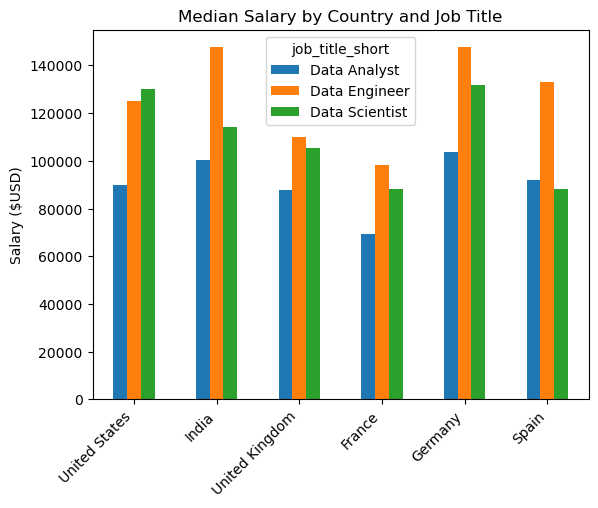

In [25]:
# create the pivot table

df_job_country_salary = df.pivot_table(
    values="salary_year_avg",
    index="job_country",
    columns="job_title_short",
    aggfunc="median"
)

# let's filter for only the top 6 countries using the .loc method and the top_countries variable

df_job_country_salary = df_job_country_salary.loc[top_countries]

# let's filter for only the job titles we care about

job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

df_job_country_salary = df_job_country_salary[job_titles]

# plot the bar chart
df_job_country_salary.plot(kind="bar")
plt.ylabel("Salary ($USD)")
plt.xlabel("")
plt.title("Median Salary by Country and Job Title")
plt.xticks(rotation=45, ha="right")
plt.show()

# 4 Problems

## 2.4.1

Create a pivot table to count the number of job postings for each job_title_short and job_country. Display the first 10 rows of the resulting pivot table.

In [30]:
# create pivot

df.pivot_table(index=["job_title_short", "job_country"], aggfunc="size").head(10)

job_title_short   job_country
Business Analyst  Afghanistan      4
                  Albania         11
                  Algeria         21
                  Angola           1
                  Argentina      453
                  Armenia         29
                  Australia      928
                  Austria        738
                  Azerbaijan      16
                  Bahamas          5
dtype: int64

## 2.4.2

Create a pivot table to find the maximum, minimum, and average salary_year_avg for each company_name. Display the first 5 rows of the resulting pivot table.

In [31]:
df.pivot_table(values="salary_year_avg", index="company_name", aggfunc=["max", "min", "mean"]).head()

,max,min,mean
,salary_year_avg,salary_year_avg,salary_year_avg
company_name,,,
#twiceasnice Recruiting,120000.000000,61000.000000,77750.000000
/dev/color,125000.000000,125000.000000,125000.000000
0nward Select,92500.000000,92500.000000,92500.000000
1 Point System,137290.484375,137290.484375,137290.484375
1 Point System LLC.,170000.000000,170000.000000,170000.000000


## 2.4.3

Create a pivot table to calculate the median of salary_year_avg for each company_name and job_country:

- Filter the pivot table to only include 'Data Scientist' roles.
- Then filter the pivot table to only include company_name with a median salary_year_avg greater than 200,000.
- Display the first 10 rows of the resulting pivot table.

In [44]:
#filter for Data Scientist roles

df_ds = df[df["job_title_short"] == "Data Scientist"].copy()

# create pivot table
pivot_table = df_ds.pivot_table(values="salary_year_avg", index=["company_name", "job_country"], aggfunc="median")

filtered_pivot_table = pivot_table[pivot_table["salary_year_avg"] > 200_000]

# filter for first 10
filtered_pivot_table.head(10)


salary_year_avg
company_name        job_country                   
ACT                 Sudan                 225000.0
                    United States         225000.0
Abbott              United States         204000.0
Airbnb              United States         212500.0
Airtable            Sudan                 215500.0
                    United States         233500.0
Algo Capital Group  Sudan                 325000.0
                    United States         350000.0
Amadeus Search      United States         232500.0
Analog Devices, Inc United States         375000.0